In [1]:
#Import packages //Importere packages
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

In [2]:
#Load data // Lade data
hepatitt_data = pd.read_csv("hepatitt.csv")

In [3]:
#Dimensions of dataset // Se dimensjonene av datasett
hepatitt_data.shape

(155, 21)

In [4]:
#See first rows // Se de første radene
hepatitt_data.head()

,Unnamed: 0,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,...,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [5]:
#See proportions of class variable // Se proporsjoner av klass variabel
hepatitt_data['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [6]:
#See types 
hepatitt_data.dtypes

Unnamed: 0           int64
Class                int64
Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver_big          float64
Liver_firm         float64
Spleen_palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk_phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

In [7]:
#See NAs
hepatitt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       155 non-null    int64  
 1   Class            155 non-null    int64  
 2   Age              155 non-null    int64  
 3   Sex              155 non-null    int64  
 4   Steroid          154 non-null    float64
 5   Antivirals       155 non-null    int64  
 6   Fatigue          154 non-null    float64
 7   Malaise          154 non-null    float64
 8   Anorexia         154 non-null    float64
 9   Liver_big        145 non-null    float64
 10  Liver_firm       144 non-null    float64
 11  Spleen_palpable  150 non-null    float64
 12  Spiders          150 non-null    float64
 13  Ascites          150 non-null    float64
 14  Varices          150 non-null    float64
 15  Bilirubin        149 non-null    float64
 16  Alk_phosphate    126 non-null    float64
 17  Sgot            

In [8]:
#Get summary statistics / Få opsummerende statistikk
hepatitt_data.describe()

,Unnamed: 0,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,...,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,77.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,0.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,38.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,77.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,115.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,154.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [9]:
#Code dummy variable to {0,1} // Kode dummy variablene til {0,1}
dummies=['Class','Sex','Steroid','Antivirals', 'Fatigue','Malaise',
                                'Anorexia','Liver_big','Liver_firm','Spleen_palpable', 'Spiders','Ascites',
                                'Varices', 'Histology']
hepatitt_data[dummies]=hepatitt_data[dummies].replace([1,2],[1,0])
hepatitt_data

,Unnamed: 0,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,...,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,0,0,30,0,1.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,1
1,1,0,50,1,1.0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,1
2,2,0,78,1,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,1
3,3,0,31,1,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,1
4,4,0,34,1,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,1,46,1,0.0,0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,0
151,151,0,44,1,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,NaN,0
152,152,0,61,1,1.0,0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,NaN,0
153,153,0,53,0,1.0,0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,0


In [10]:
#Drop protime & Unnamed
hepatitt_data = hepatitt_data.drop(['Protime','Unnamed: 0' ], axis=1)

#Create dataset with median of each varible depending on class //Lage et datasett med gjennomsnitt for hver variabel med to rader
medians = hepatitt_data.groupby(['Class']).median()
medians

#Fill NAs with mean variable value from its class group // Fille NAs med verdiene fra datasett ovenfor
hepatitt_data.set_index("Class",
                        inplace = True,append = True,drop = False) #Sets Class as index

hepatitt_data = hepatitt_data.fillna(medians)
hepatitt_data = hepatitt_data.reset_index(drop=True)#Resets index to only patient number // Nullstille index
hepatitt_data[hepatitt_data.isna().any(axis=1)]

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Histology


In [11]:
#######Select variables by univariate logistic regression, gives a worse score and recall //
#######Å velge variablene med bruk av univariate logistisk regresjon gir en verre resultat
#X = hepatitt_data.drop(['Class'], axis=1)
#Y = hepatitt_data['Class']
#variables = ['Class']
#for x in X.columns:
#    logit_model=sm.Logit(Y,hepatitt_data[x])
#    result = logit_model.fit()
#    if list(result.pvalues)[0] <0.1:
#        variables.append(x)
#    else:
#        pass
#hepatitt_data=hepatitt_data[variables]

In [12]:
#Run logistic regression and select statistically significant variables at (p<0.1) 
#// Kjøre logistisk regresjon og velge variablene som er statistisk signifikant
X = hepatitt_data.drop(['Class'], axis=1)
Y = hepatitt_data['Class']

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
result.summary2()

variables= ['Class', 'Anorexia', 'Liver_firm', 'Spiders', 'Bilirubin', 'Albumin'] #Statistically significant
hepatitt_data=hepatitt_data[variables]

Optimization terminated successfully.
         Current function value: 0.219435
         Iterations 8


In [13]:
#Check for multicolinearity // Sjekke for multikolinearitet
X = hepatitt_data.drop(['Class'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature       VIF
0    Anorexia  1.485905
1  Liver_firm  1.803753
2     Spiders  1.948969
3   Bilirubin  2.531734
4     Albumin  2.451036


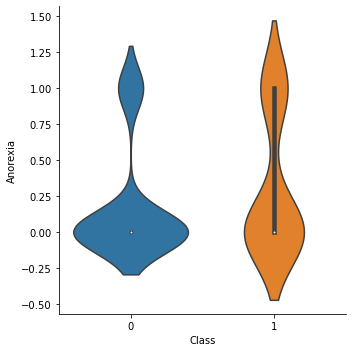

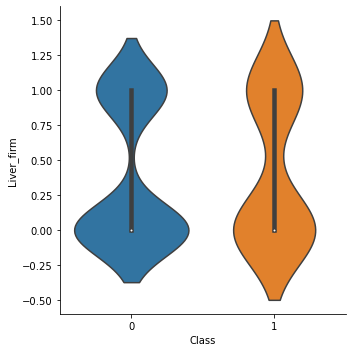

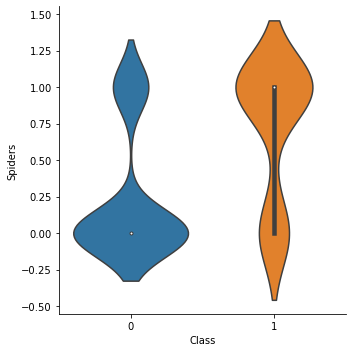

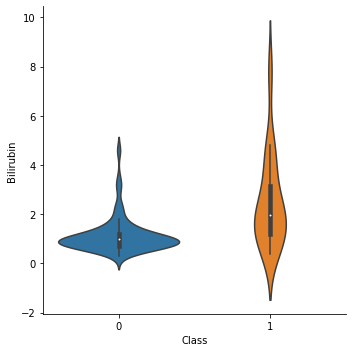

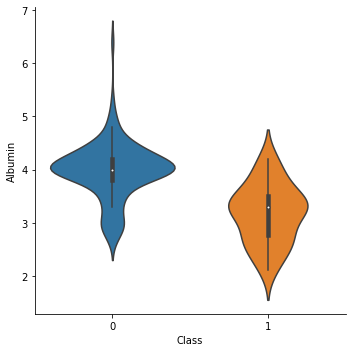

In [14]:
#Create function to visualize variables // Lage en funksjon til å vise variablene
def plot(variable, data, style):
    return sns.catplot(data= data, x="Class", y=variable, kind=str(style))
#Use of the function above (distributions recommended) // Bruke funksjon ovenfor (ambefalt å bruke distrbusjoner)
for x in hepatitt_data.columns[1:]:
    plot(x,hepatitt_data,"violin")


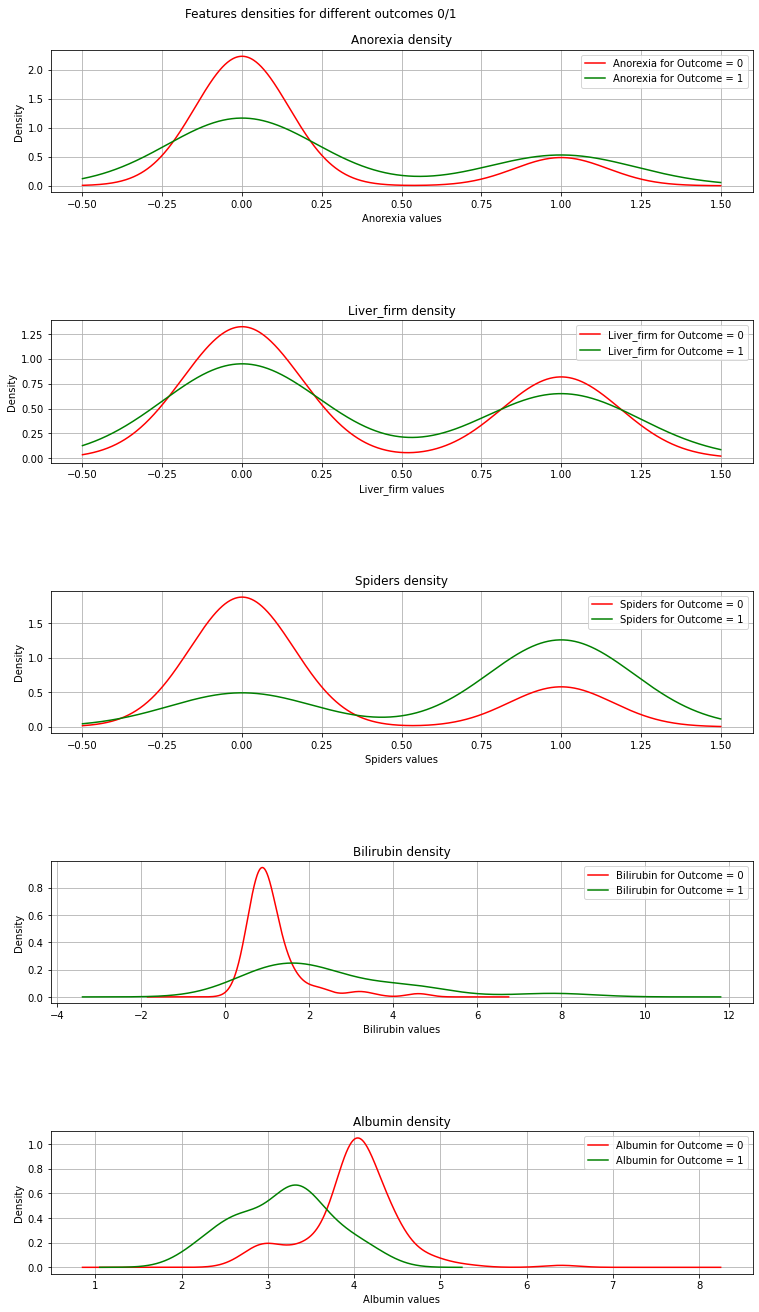

In [15]:
#Plot densities for each variable and compare between class groups // Tegne tetthetene for hver en av variablene og sammenligne blant klassene
def plot_densities(data):
  
    #Adjust size
    rcParams['figure.figsize'] = 15, 20

    #Set up groups 
    group_0 = data[data['Class'] == 0]
    group_1 = data[data['Class'] == 1]

    #Info
    fig, axs = plt.subplots(len(data.columns)-1, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    #Plot densities for groups // Tegne tettheten
    for column_name in names: 

        ax = axs[names.index(column_name)]
        group_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                        sharex=False, color="red", legend=True,
                                        label=column_name + ' for Outcome = 0')
        group_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                         sharex=False, color="green", legend=True,
                                         label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')

    plt.show()

#Pass data   
names = list(hepatitt_data.columns)[1:]    
plot_densities(hepatitt_data)

In [16]:
#Split data into train & test sets (70/30) // Dele data i train og test grupper
x = hepatitt_data.drop("Class", axis = 1).values
y = hepatitt_data['Class'].values
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                               test_size = 0.3, 
                                               random_state=42)

In [17]:
#Check that group distribution (20%) is conserved // Sjekke at gruppefordeling respekteres
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 85, 1: 23}

In [18]:
#List to be filled 
models = ['Logistic', 'Random Forest', 'KNN']
models_recall = list()
models_performance = list()

In [19]:
#Logistic regression model // Logistisk regresjon
model_logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logisticRegr.fit(x_train, np.ravel(y_train,order='C'))

y_pred=model_logisticRegr.predict(x_test) #Get predicted values // Få predikerte verdiene

cm=metrics.confusion_matrix(y_test,y_pred)#Make confusion matrix 
TP = cm[0][0] #Select True Positive (TP) 
FN = cm[1][0] #Select False Negative (FN)
recall = TP/(TP+FN) #Calculate recall 

models_performance.append(model_logisticRegr.score(x_test,y_test))
models_recall.append(recall)

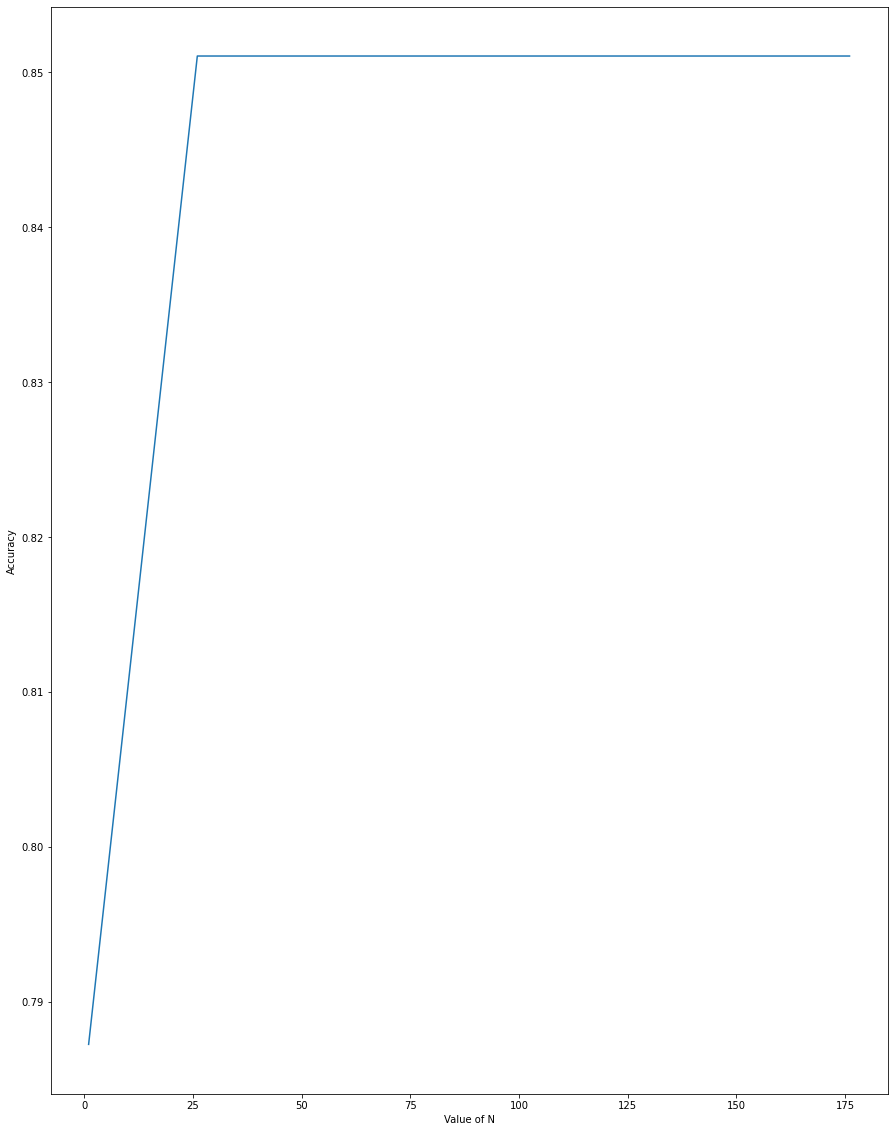

In [20]:
#Random forest regression

#See what n_estimators # gets the best accuracy // Vise hvilken n_estimator # gir oss den beste accuracy
n_range=range(1,200,25) 
scores = {}
scores_list = []
for n in n_range:
    model_randomforest = RandomForestClassifier(n_estimators=n)
    model_randomforest.fit(x_train,np.ravel(y_train,order='C'))
    y_pred = model_randomforest.predict(x_test)
    scores[n] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

#Plot accuracy // Tegne 
plt.plot(n_range,scores_list)
plt.xlabel('Value of N')
plt.ylabel('Accuracy')

#Set up the model with n that maximizes accuracy
model_randomforest=RandomForestClassifier(n_estimators=max(scores, key=scores.get))
model_randomforest.fit(x_train,np.ravel(y_train,order='C'))

y_pred=model_randomforest.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred)
TP = cm[0][0]
FN = cm[1][0]
recall = TP/(TP+FN)

models_performance.append(model_randomforest.score(x_test,y_test))
models_recall.append(recall)

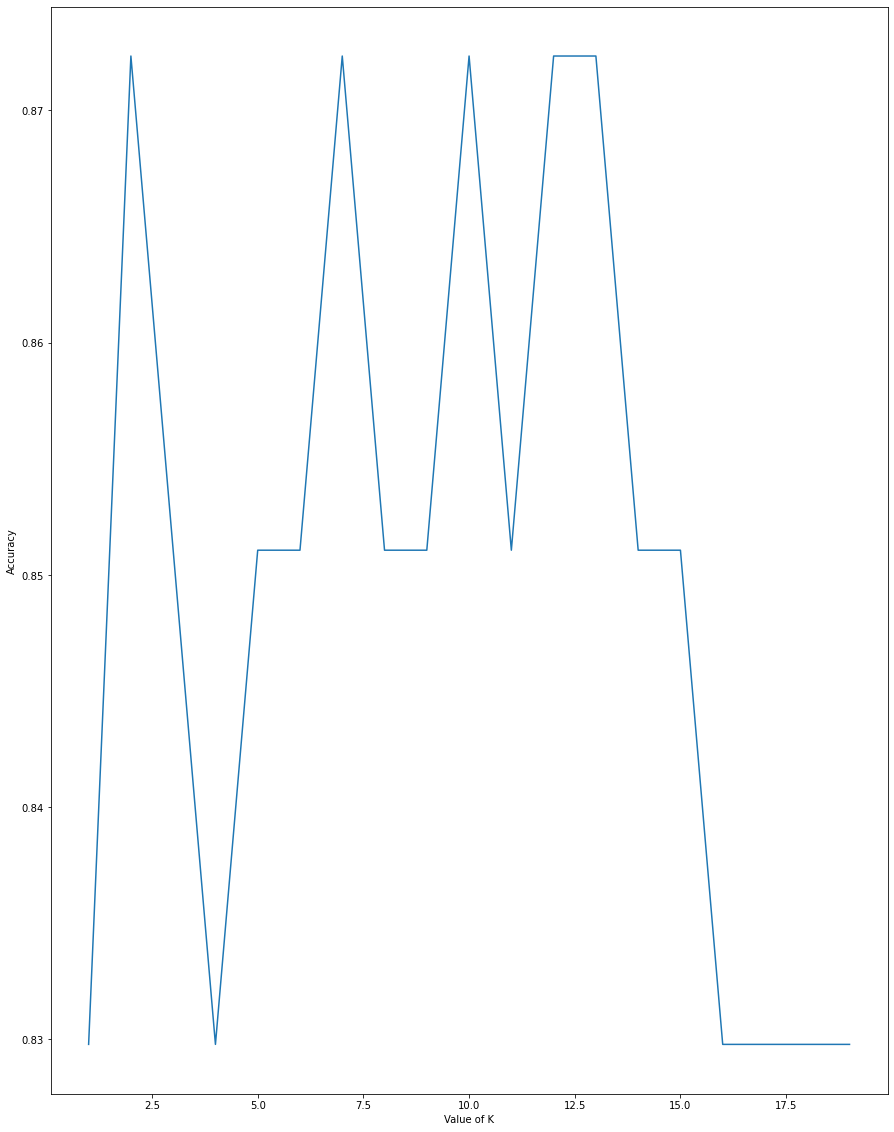

In [21]:
#K nearest neighbord model

#See what k gives us the best accuracy // Vise hvilken k gir oss den beste accuracy
k_range=range(1,20)
scores = {}
scores_list = []
for k in k_range:
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(x_train,np.ravel(y_train,order='C'))
    y_pred = model_KNN.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

#Plot results #Tegne
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

#Set up the model with the k that maximizes accuracy
model_KNN = KNeighborsClassifier(n_neighbors=max(scores, key=scores.get))
model_KNN.fit(x_train,np.ravel(y_train,order='C'))
y_pred = model_KNN.predict(x_test)

cm=metrics.confusion_matrix(y_test,y_pred)
TP = cm[0][0]
FN = cm[1][0]
recall = TP/(TP+FN)

models_performance.append(model_KNN.score(x_test,y_test))
models_recall.append(recall)

In [22]:
#See score and recall for each model // Se resultate for score og recall
results= {'Score':models_performance, 'Recall':models_recall}
results=pd.DataFrame(results, index= models)#Lage dataframe
results

,Score,Recall
Logistic,0.914894,0.904762
Random Forest,0.851064,0.878049
KNN,0.872340,0.880952


In [23]:
#Create patient class so that results from models can be applied to new data #Lage en patient klasse så at resultatene from modele kan brukes med nye data
class Patient():
    
    #For patient indicate the variables used for the training process // Ta data til patient
    def __init__(self, anorexia,liver_firm,spiders,bilirubin, albumin):
        self.anorexia = anorexia
        self.liver_firm = liver_firm
        self.spiders = spiders
        self.bilirubin = bilirubin
        self.albumin = albumin
        
    #Create a function for each model, printing prediction and accuracy interval // Lage en funksjon til hver model, print prediksjonen og accuracy intervall
    def predict_log(self):
        arr = np.array([self.anorexia, self.liver_firm, self.spiders,
                        self.bilirubin,self.albumin])#Patient attributes to array // Patients egenskaper
        score=model_logisticRegr.score(x_test,y_test)#score of the model 
        #Binomial confidence interval
        interval = 1.96 * sqrt( ((1-score) * score) / len(x_train)) #Error interval (larger train set lower error interval)
        upper = round(score+interval,3)#Upper accuracy limit
        lower = round(score-interval,3)#Lower accuracy limit
        prediction= model_logisticRegr.predict(arr.reshape(1, -1)) #Class Prediction  // Prediksjon
        return print("Model accuracy between:", upper,"and", lower), prediction 
    def predict_randomforest(self):
        arr = np.array([self.anorexia, self.liver_firm, self.spiders,
                        self.bilirubin,self.albumin])
        score=model_randomforest.score(x_test,y_test)
        interval = 1.96 * sqrt( ((1-score) * score) / len(x_train))
        upper = round(score+interval,3)
        lower = round(score-interval,3)
        prediction= model_randomforest.predict(arr.reshape(1, -1))
        return print("Model accuracy between:", upper,"and", lower), prediction
    
    def predict_KNN(self):
        arr = np.array([self.anorexia, self.liver_firm, self.spiders,
                        self.bilirubin,self.albumin])
        score=model_KNN.score(x_test,y_test)
        interval = 1.96 * sqrt( ((1-score) * score) / len(x_train))
        upper = round(score+interval,3)
        lower = round(score-interval,3)
        prediction= model_KNN.predict(arr.reshape(1, -1))
        return print("Model accuracy between:", upper,"and", lower), prediction